# Catalonia Municipal Waste Study
## Dataset Enrichment

### Description
In the following set of notebooks, it's collected the study on the dataset of Catalonia Municipal Waste published by the Generalitat de Catalunya through the portal of open data. The intention is to research and dig into this data to find interesting conclusions and possible applications.

In this specific library, the dataset is enriched with other data that can be interesting to do the study more complete. To be more specific, the dataset will be enriched with some geographic data that will help us to visualize the data in a much better way. 

### Used Datasets

[Estadistiques de residus municipals](https://analisi.transparenciacatalunya.cat/Medi-Ambient/Estad-stiques-de-residus-municipals/69zu-w48s)

[Comarques Catalunya GeoJson](https://github.com/aariste/GeoJSON-Mapas)

[Municipis Catalunya Geo](https://analisi.transparenciacatalunya.cat/Urbanisme-infraestructures/Municipis-Catalunya-Geo/9aju-tpwc)

It has been decided to use these datasets, as we found it interesting doing a study of the history of the waste generated in Catalonia these Recent years. Managing well the waste is a problem because there is a lot of waste generated by humans. Plotting the information and correlating it with things that happened had give us good insights into how is being managed and, overall, if Catalonia is following a good path.

By applying the geographic information, we were able to see which waste is most generated in which parts of Catalonia. Gives us insights into how the population is managing the waste, and also, where the different industries that we have in the territory are located.

### Tools Used

In this notebook, the two main tools used to merge those datasets are Pandas and GeoPandas. As it was required some specific GeoPandas functions for merging the datasets.

### Running the code

For running the code it's just required to press the play all cells button. (Or run it one by one)

### Authors
Marc Felip Pomes, Joaquim Picó Mora 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from shapely import wkt
import csv

/home/quim/.local/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [6]:
geo_file = "./datasets/comarques-catalunya.geojson"
waste_file = "./datasets/Estad_stiques_de_residus_municipals.csv"

In [7]:
df = pd.read_csv(waste_file)
df

,Any,Codi municipi,Municipi,Comarca,Població,Autocompostatge,Matèria orgànica,Poda i jardineria,Paper i cartró,Vidre,...,Kg/hab/any recollida selectiva,Resta a Dipòsit,Resta a Incineració,Resta a Tractament Mecànic Biològic,Resta (sense desglossar),Suma Fracció Resta,F.R. / R.M. %,Generació Residus Municipal Totals,Kg / hab / dia,Kg / hab / any
0,2000,430017.0,Aiguamúrcia,Alt Camp,614.000,NaN,0.00,0.00,12.51,37.00,...,86.92,NaN,NaN,NaN,41761.0,417.61,88.67,470.98,2.10,767.07
1,2000,430056.0,Alcover,Alt Camp,3.523,NaN,0.00,0.00,79.44,81.00,...,77.15,NaN,NaN,NaN,134052.0,1340.52,83.14,1612.33,1.25,457.66
2,2000,430108.0,Alió,Alt Camp,339.000,NaN,0.00,0.00,4.63,7.00,...,38.42,NaN,NaN,NaN,10204.0,102.04,88.68,115.07,0.93,339.43
3,2000,430347.0,Bràfim,Alt Camp,569.000,NaN,0.00,0.00,9.89,11.00,...,41.28,NaN,NaN,NaN,27136.0,271.36,92.03,294.85,1.42,518.18
4,2000,430363.0,Cabra del Camp,Alt Camp,483.000,NaN,0.00,0.00,8.40,12.00,...,46.94,NaN,NaN,NaN,427.0,427.00,94.96,449.67,2.55,931.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18942,2019,82763.0,Tagamanent,Vallès Oriental,323.000,6.0,49.58,0.28,7.26,12.34,...,293.88,0.0,0.0,4474.0,NaN,44.74,32.03,139.66,1.18,432.40
18943,2019,82943.0,Vallgorguina,Vallès Oriental,2.891,0.0,141.11,15.17,65.30,65.30,...,215.61,0.0,0.0,10122.0,NaN,1012.20,61.89,1635.53,1.55,565.73
18944,2019,82969.0,Vallromanes,Vallès Oriental,2.579,27.0,79.16,12.45,77.06,89.00,...,189.34,0.0,0.0,112886.0,NaN,1128.86,69.80,1617.16,1.72,627.05
18945,2019,83067.0,Vilalba Sasserra,Vallès Oriental,716.000,0.0,42.15,12.32,23.73,19.83,...,254.35,0.0,0.0,27706.0,NaN,277.06,60.34,459.17,1.76,641.31


In [13]:
from functools import reduce
reduce(lambda acc, x : acc or x, df.duplicated(subset=["Any", "Municipi"]))

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18947 entries, 0 to 18946
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Any                                            18947 non-null  int64  
 1   Codi municipi                                  18927 non-null  float64
 2   Municipi                                       18946 non-null  object 
 3   Comarca                                        18927 non-null  object 
 4   Població                                       18947 non-null  float64
 5   Autocompostatge                                7583 non-null   float64
 6   Matèria orgànica                               18947 non-null  float64
 7   Poda i jardineria                              18947 non-null  float64
 8   Paper i cartró                                 18947 non-null  float64
 9   Vidre                                          189

In [5]:
df.describe()

,Any,Codi municipi,Població,Autocompostatge,Matèria orgànica,Poda i jardineria,Paper i cartró,Vidre,Envasos lleugers,Residus voluminosos + fusta,...,Kg/hab/any recollida selectiva,Resta a Dipòsit,Resta a Incineració,Resta a Tractament Mecànic Biològic,Resta (sense desglossar),Suma Fracció Resta,F.R. / R.M. %,Generació Residus Municipal Totals,Kg / hab / dia,Kg / hab / any
count,18947.000000,18927.000000,1.894700e+04,7583.000000,18947.000000,18947.000000,18947.000000,18947.000000,18947.000000,18947.000000,...,18947.000000,1.515900e+04,1.515900e+04,1.515900e+04,3.788000e+03,18947.000000,18947.000000,18947.000000,18947.000000,18947.000000
mean,2009.502560,211801.607281,1.895287e+03,53.998549,302.036081,81.738216,280.208806,155.346877,101.166495,175.714523,...,161.780772,9.761744e+04,3.383281e+04,7.828236e+04,1.711860e+05,2362.853487,69.657114,4055.274806,1.528665,557.245615
std,5.766987,125148.354284,5.176378e+04,153.666448,3044.135268,427.157001,3659.614862,1272.197954,676.686559,1239.980442,...,115.437389,5.821312e+05,4.449222e+05,1.018037e+06,1.206595e+06,17477.475831,18.593340,28010.944141,0.656798,239.228539
min,2000.000000,80018.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.140000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,82397.000000,4.075500e+00,0.000000,0.000000,0.000000,7.700000,8.640000,3.650000,0.150000,...,80.370000,2.006500e+03,0.000000e+00,0.000000e+00,6.193750e+03,93.010000,58.640000,158.950000,1.150000,418.425000
50%,2010.000000,171753.000000,1.030000e+02,0.000000,9.190000,0.000000,22.400000,22.690000,12.020000,7.360000,...,139.420000,1.131500e+04,0.000000e+00,0.000000e+00,2.222700e+04,266.400000,72.460000,449.350000,1.370000,498.470000
75%,2015.000000,252075.000000,3.460000e+02,48.000000,118.665000,16.805000,97.300000,79.415000,50.365000,55.510000,...,215.805000,4.398800e+04,0.000000e+00,0.000000e+00,8.064950e+04,1030.325000,84.470000,1909.620000,1.690000,617.570000
max,2019.000000,439076.000000,1.636762e+06,2764.000000,128393.620000,13457.290000,176871.400000,51232.540000,25792.810000,51485.300000,...,2187.450000,3.442274e+07,2.237408e+07,4.506766e+07,6.667544e+07,688440.420000,100.000000,902356.180000,8.720000,3183.920000


## Enrichment of the dataset

As it has been said, the dataset will be enriched with geographical data. For doing so, we are going to create 3 different datasets. This is going to be like this because we are using a library called geopandas that helps us to manage and represent geographical information and it has some constraints. For example, we can only have one column with geographical information per dataset.

### Geo Waste Regions:
This dataset is going to contain all the information regarding the different kinds of waste thrown in Catalonia alongside the geographical information to represent the different regions of the territory.

### Geo Waste municipalities:
This dataset is going to contain all the information regarding the different kinds of waste thrown in Catalonia alongside the geographical information to represent the different municipalities of the territory.

### Geo Regions
This dataset is going to contain just the geographical information of the regions of Catalonia in case we want to use the map as a background for some other plots. For example, the plots that we are going to do with Geo Waste municipalities data frame.

In [6]:
df1 = df.dropna(subset=['Municipi', 'Comarca'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18927 entries, 0 to 18946
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Any                                            18927 non-null  int64  
 1   Codi municipi                                  18927 non-null  float64
 2   Municipi                                       18927 non-null  object 
 3   Comarca                                        18927 non-null  object 
 4   Població                                       18927 non-null  float64
 5   Autocompostatge                                7575 non-null   float64
 6   Matèria orgànica                               18927 non-null  float64
 7   Poda i jardineria                              18927 non-null  float64
 8   Paper i cartró                                 18927 non-null  float64
 9   Vidre                                          189

In [7]:
def read_geofile(path_to_data):
    return geopandas.read_file(path_to_data)

comarques = read_geofile(geo_file)
comarques = comarques.dissolve(by='comarca').drop(columns=["cap_comar"])
comarques.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 41 entries, 01 to 41
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geometry   41 non-null     geometry
 1   nom_comar  41 non-null     object  
dtypes: geometry(1), object(1)
memory usage: 2.0+ KB


Example plot of Catalunya regions using geopandas

<AxesSubplot:>

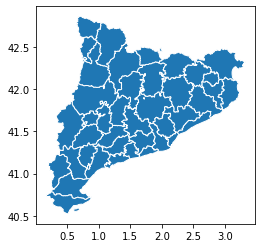

In [8]:
comarques.plot(edgecolor="white")

In [9]:
villages = pd.read_csv("./datasets/Municipis_Catalunya_Geo.csv")
villages = villages.drop(columns=["Codi", "Codi comarca", "Nom comarca", "UTM X", "UTM Y"])
villages = geopandas.GeoDataFrame(
    villages, geometry=geopandas.points_from_xy(villages.Longitud, villages.Latitud))
villages.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Nom       949 non-null    object  
 1   Longitud  949 non-null    float64 
 2   Latitud   949 non-null    float64 
 3   geometry  949 non-null    geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 29.8+ KB


In [10]:
def add_geometry_region_to_main_df(file, main_df, gdf, key1, key2):
    return pd.merge(gdf, main_df, left_on=key1, right_on=key2)


geo_df = add_geometry_region_to_main_df(geo_file, df1, villages, 'Nom', 'Municipi')
geo_df_comarca = add_geometry_region_to_main_df(geo_file, df1, comarques, 'nom_comar', 'Comarca')
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18846 entries, 0 to 18845
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Nom                                            18846 non-null  object  
 1   Longitud                                       18846 non-null  float64 
 2   Latitud                                        18846 non-null  float64 
 3   geometry                                       18846 non-null  geometry
 4   Any                                            18846 non-null  int64   
 5   Codi municipi                                  18846 non-null  float64 
 6   Municipi                                       18846 non-null  object  
 7   Comarca                                        18846 non-null  object  
 8   Població                                       18846 non-null  float64 
 9   Autocompostatge                

In [11]:
geo_df_comarca.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18877 entries, 0 to 18876
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   geometry                                       18877 non-null  geometry
 1   nom_comar                                      18877 non-null  object  
 2   Any                                            18877 non-null  int64   
 3   Codi municipi                                  18877 non-null  float64 
 4   Municipi                                       18877 non-null  object  
 5   Comarca                                        18877 non-null  object  
 6   Població                                       18877 non-null  float64 
 7   Autocompostatge                                7525 non-null   float64 
 8   Matèria orgànica                               18877 non-null  float64 
 9   Poda i jardineria              

In [12]:
geo_df = geo_df.drop(columns=["Nom"])
geo_df_comarca = geo_df_comarca.drop(columns=["nom_comar"])
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18846 entries, 0 to 18845
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Longitud                                       18846 non-null  float64 
 1   Latitud                                        18846 non-null  float64 
 2   geometry                                       18846 non-null  geometry
 3   Any                                            18846 non-null  int64   
 4   Codi municipi                                  18846 non-null  float64 
 5   Municipi                                       18846 non-null  object  
 6   Comarca                                        18846 non-null  object  
 7   Població                                       18846 non-null  float64 
 8   Autocompostatge                                7542 non-null   float64 
 9   Matèria orgànica               

In [13]:
geo_df_comarca.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18877 entries, 0 to 18876
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   geometry                                       18877 non-null  geometry
 1   Any                                            18877 non-null  int64   
 2   Codi municipi                                  18877 non-null  float64 
 3   Municipi                                       18877 non-null  object  
 4   Comarca                                        18877 non-null  object  
 5   Població                                       18877 non-null  float64 
 6   Autocompostatge                                7525 non-null   float64 
 7   Matèria orgànica                               18877 non-null  float64 
 8   Poda i jardineria                              18877 non-null  float64 
 9   Paper i cartró                 

### Some other exemples of maps

Text(29.75, 0.5, 'Latitude')

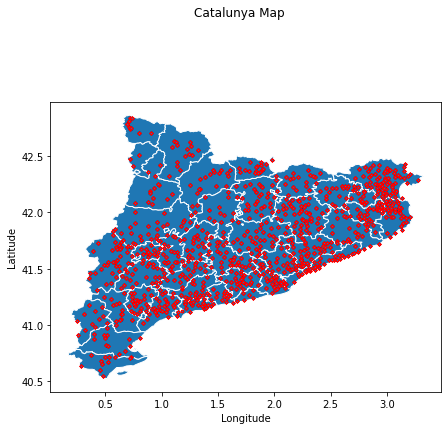

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
comarques.plot(ax=ax, edgecolor="white")
geo_df.plot(ax =ax, markersize=5, edgecolor="red")
fig.suptitle('Catalunya Map', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

Text(33.54729140395341, 0.5, 'Latitude')

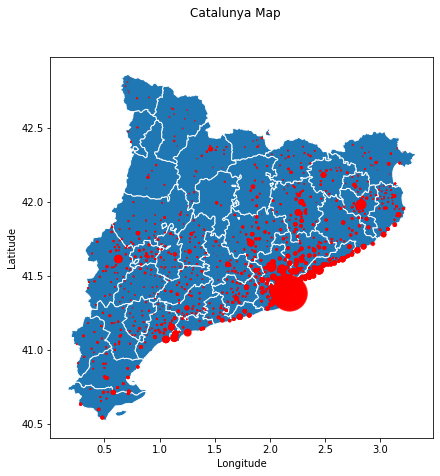

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
comarques.plot(ax=ax, edgecolor="white")
plt.scatter(geo_df.Longitud, geo_df.Latitud, s=geo_df["Matèria orgànica"]/100, color="red", alpha=0.3)
fig.suptitle('Catalunya Map', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

Text(29.75, 0.5, 'Latitude')

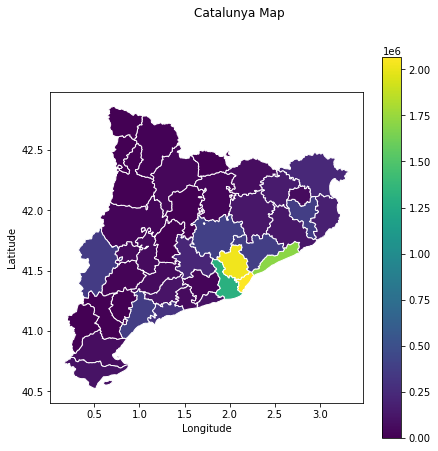

In [16]:
fig, ax = plt.subplots(figsize=(7,7))
geo_df_gruped_test = geo_df_comarca.drop(columns=geo_df_comarca.columns.difference(['geometry','Comarca','Tèxtil'])).dissolve(by='Comarca', aggfunc='sum')
geo_df_gruped_test.plot(ax=ax, column='Tèxtil', edgecolor="white", legend=True)
fig.suptitle('Catalunya Map', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

In [17]:
geo_df.to_csv("./datasets/enriched/residus_municipi_geo.csv")
geo_df_comarca.to_csv("./datasets/enriched/residus_comarca_geo.csv")
comarques.to_csv("./datasets/enriched/comarques_geo.csv")